## Text Mining em documentos de Defesa Norte Americanos

##### Objetivo:
* Ver a quantidade de vezes que palavras relacionadas com cyber security aparecem aparecem conforme passam os anos.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from bs4 import BeautifulSoup
import re
import string
import os
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
#from collections import Counter
sns.set(font_scale=1.5)


%matplotlib inline

In [3]:
import utilidade as u

In [4]:
df = u.ler_todos_arquivos()

                                                   text
2013     Statement for the Record  \n Worldwide Thre...
2015   \n \nStatement for the Record \n \n \nWorldwi...
2010      Annual Threat Assessment of the   US Intel...
2012   \n \n \n \n \nUnclassified Statement for the ...
2007    \n Annual Threat Assessment \nof the \nDirec...


In [5]:
nltk.download('stopwords')
stop = stopwords.words('english')

#Adicionando algumas palavras que se percebeu ser comum nos arquivos e que não somam muito no objetivo
stop.append('us')
stop.append('united')
stop.append('states')
stop.append('also')

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


In [6]:
alphanumeric = lambda x: re.sub(r"""\w*\d\w*""", ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
remove_br = lambda x: re.sub(r""" br """, ' ', x.lower())
remove_n = lambda x: re.sub(r""" [\r\n]+ """, ' ', x.lower())
line = lambda x: x.strip()
linen =  lambda x: re.sub("\n","",x)


df['text_b'] = df.text.map(alphanumeric).map(punc_lower).map(remove_br).map(remove_n).map(line).map(linen)
df['text_b'] = df['text_b'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

In [7]:
most_commom_uni = u.get_top_text_ngrams(df.text_b, 1, stopwords=stop)

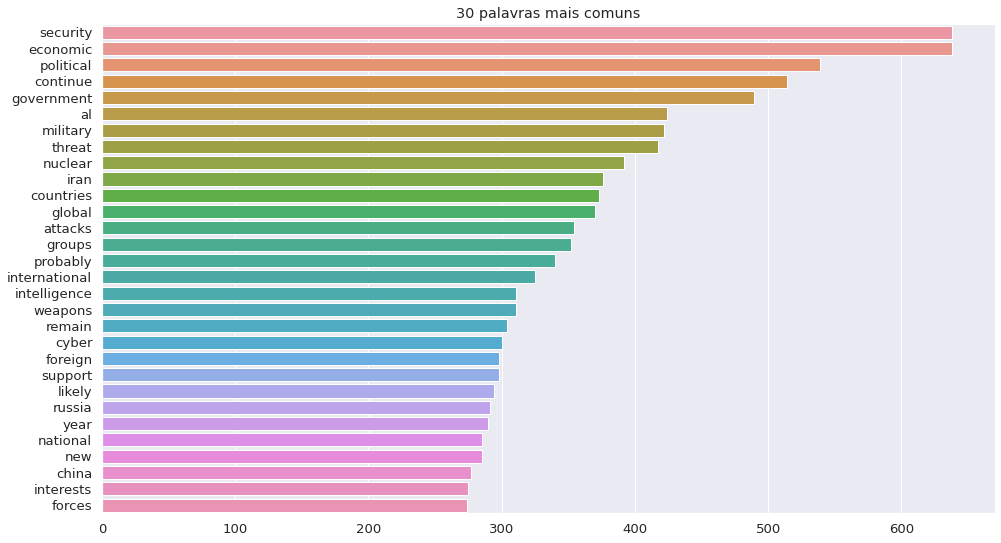

In [8]:
u.plota_frequencia_dict(most_commom_uni)

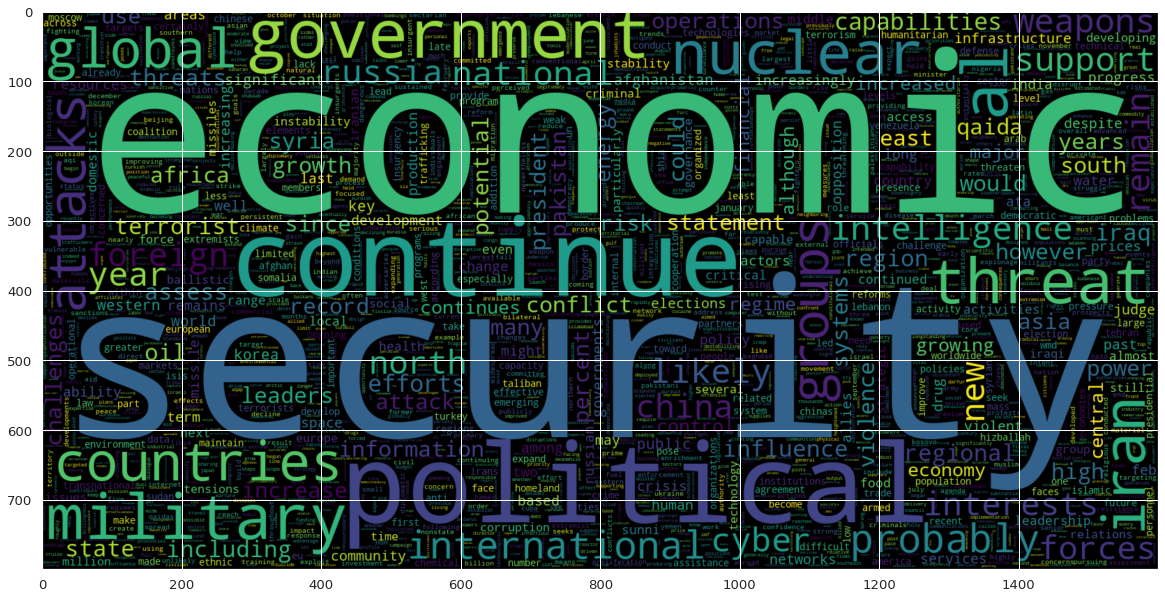

In [9]:
u.plota_wordcloud(most_commom_uni, stop)

In [10]:
most_commom_bi = u.get_top_text_ngrams(df.text_b, 2, stop)

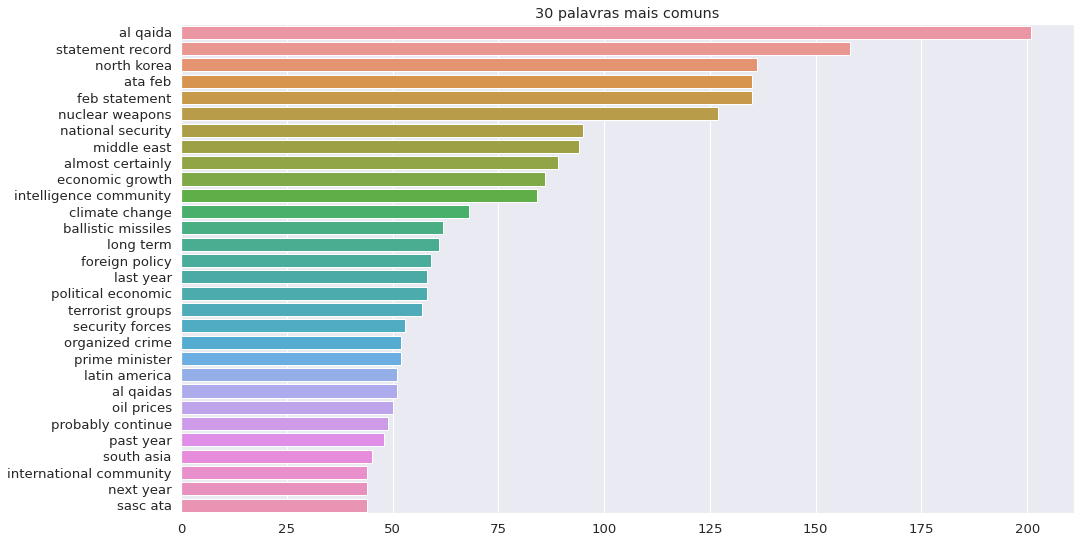

In [11]:
u.plota_frequencia_dict(most_commom_bi)

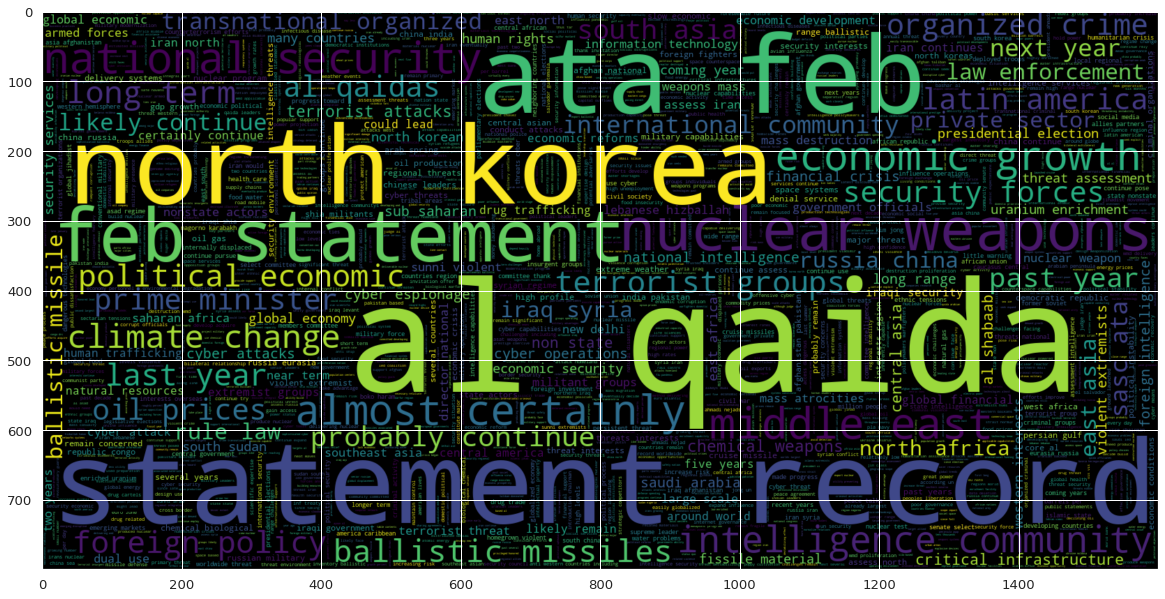

In [12]:
u.plota_wordcloud(most_commom_bi, stop)

In [13]:
nltk.download('all')

[nltk_data] Error loading all: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


False

In [14]:
#Para fazer tokenização

stop_lambda = lambda x: [y for y in x if y not in stop]
pos_lambda = lambda x: nltk.pos_tag(x)

df['token'] = df.text_b.map(word_tokenize)
df['tokens_stop'] = df.token.apply(stop_lambda)
df['tokens_pos'] = (df.tokens_stop.apply(pos_lambda))
# Convert the naming scheme to one that is recognized by WordNet
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

lemmatizer = WordNetLemmatizer()
lemmatizer_fun = lambda x: lemmatizer.lemmatize(*x)
df['tokens_lemma'] = df.tokens_pos\
                        .apply(lambda x: [(y[0], get_wordnet_pos(y[1])) for y in x])\
                        .apply(lambda x: [lemmatizer_fun(y) for y in x])

In [15]:
df.head()

,text,text_b,token,tokens_stop,tokens_pos,tokens_lemma
2013,Statement for the Record \n Worldwide Thre...,statement for the record worldwide threat ass...,"[statement, for, the, record, worldwide, threa...","[statement, record, worldwide, threat, assessm...","[(statement, NN), (record, NN), (worldwide, NN...","[statement, record, worldwide, threat, assessm..."
2015,\n \nStatement for the Record \n \n \nWorldwi...,statement for the record worldwide threat ass...,"[statement, for, the, record, worldwide, threa...","[statement, record, worldwide, threat, assessm...","[(statement, NN), (record, NN), (worldwide, NN...","[statement, record, worldwide, threat, assessm..."
2010,Annual Threat Assessment of the US Intel...,annual threat assessment of the us intellige...,"[annual, threat, assessment, of, the, us, inte...","[annual, threat, assessment, intelligence, com...","[(annual, JJ), (threat, NN), (assessment, JJ),...","[annual, threat, assessment, intelligence, com..."
2012,\n \n \n \n \nUnclassified Statement for the ...,unclassified statement for the record on the ...,"[unclassified, statement, for, the, record, on...","[unclassified, statement, record, worldwide, t...","[(unclassified, JJ), (statement, NN), (record,...","[unclassified, statement, record, worldwide, t..."
2007,\n Annual Threat Assessment \nof the \nDirec...,annual threat assessment of the director of na...,"[annual, threat, assessment, of, the, director...","[annual, threat, assessment, director, nationa...","[(annual, JJ), (threat, NN), (assessment, JJ),...","[annual, threat, assessment, director, nationa..."


In [16]:
di = {}

for x in df.index:
    g = []
    for gram in ngrams(df['tokens_lemma'][x],2): 
        g.append(' '.join(gram))
    di[x] = g
df['bi_gram'] = di.values()


di = {}

for x in df.index:
    g = []
    for gram in ngrams(df['tokens_lemma'][x],3): 
        g.append(' '.join(gram))
    di[x] = g
df['tri_gram'] = di.values()

In [17]:
df.drop('2011',inplace=True)

In [18]:
df.head()

,text,text_b,token,tokens_stop,tokens_pos,tokens_lemma,bi_gram,tri_gram
2013,Statement for the Record \n Worldwide Thre...,statement for the record worldwide threat ass...,"[statement, for, the, record, worldwide, threa...","[statement, record, worldwide, threat, assessm...","[(statement, NN), (record, NN), (worldwide, NN...","[statement, record, worldwide, threat, assessm...","[statement record, record worldwide, worldwide...","[statement record worldwide, record worldwide ..."
2015,\n \nStatement for the Record \n \n \nWorldwi...,statement for the record worldwide threat ass...,"[statement, for, the, record, worldwide, threa...","[statement, record, worldwide, threat, assessm...","[(statement, NN), (record, NN), (worldwide, NN...","[statement, record, worldwide, threat, assessm...","[statement record, record worldwide, worldwide...","[statement record worldwide, record worldwide ..."
2010,Annual Threat Assessment of the US Intel...,annual threat assessment of the us intellige...,"[annual, threat, assessment, of, the, us, inte...","[annual, threat, assessment, intelligence, com...","[(annual, JJ), (threat, NN), (assessment, JJ),...","[annual, threat, assessment, intelligence, com...","[annual threat, threat assessment, assessment ...","[annual threat assessment, threat assessment i..."
2012,\n \n \n \n \nUnclassified Statement for the ...,unclassified statement for the record on the ...,"[unclassified, statement, for, the, record, on...","[unclassified, statement, record, worldwide, t...","[(unclassified, JJ), (statement, NN), (record,...","[unclassified, statement, record, worldwide, t...","[unclassified statement, statement record, rec...","[unclassified statement record, statement reco..."
2007,\n Annual Threat Assessment \nof the \nDirec...,annual threat assessment of the director of na...,"[annual, threat, assessment, of, the, director...","[annual, threat, assessment, director, nationa...","[(annual, JJ), (threat, NN), (assessment, JJ),...","[annual, threat, assessment, director, nationa...","[annual threat, threat assessment, assessment ...","[annual threat assessment, threat assessment d..."


In [19]:
uni = u.analise_anos(df, 2, 0)

[(11, 'north korea'), (11, 'al qaida'), (10, 'foreign policy'), (10, 'almost certainly'), (9, 'south sudan'), (9, 'nuclear weapon'), (9, 'national security'), (9, 'intelligence community'), (9, 'ballistic missile'), (8, 'next year'), (8, 'long term'), (8, 'economic growth'), (8, 'critical infrastructure'), (7, 'western interest'), (7, 'supply chain'), (7, 'organize crime'), (7, 'middle east'), (7, 'foreign intelligence'), (6, 'two year'), (6, 'transnational organize')]
                        quantidade
north korea                     11
al qaida                        11
foreign policy                  10
almost certainly                10
intelligence community           9
---------
north korea               0.001163
al qaida                  0.001163
foreign policy            0.001057
almost certainly          0.001057
intelligence community    0.000951
Name: quantidade, dtype: float64
[(12, 'almost certainly'), (11, 'probably continue'), (11, 'north korea'), (11, 'cyber attack'), (

In [30]:
assuntos = ['cyber', 'nuclear', 'north korea', 'al qaida']
#WMD, Middle East, Al qaida,

In [31]:
#analise = pd.DataFrame()
#for assunto in assuntos:
#    parcial = u.faz_analise(uni, assunto)
#    analise = analise.append(parcial)
#
#analise.sort_values(['Group'], inplace=True)

In [32]:
analise = u.faz_analise_multipla(uni, assuntos) #Preencher em anos que não existem

                     quantidade  porcentagem Group
cyber espionage             5.0     0.000528  2013
cyber attack                4.0     0.000423  2013
cyber threat                3.0     0.000317  2013
threat cyber                2.0     0.000211  2013
cyber capability            2.0     0.000211  2013
...                         ...          ...   ...
estimate cybercrime         1.0     0.000130  2019
cybercrime often            1.0     0.000130  2019
labor cyber                 1.0     0.000130  2019
cyber theft                 1.0     0.000130  2019
campaign cyber              1.0     0.000130  2019

[514 rows x 3 columns]
                          quantidade  porcentagem Group
nuclear weapon                   9.0     0.000951  2013
nuclear capability               3.0     0.000317  2013
nuclear program                  3.0     0.000317  2013
develop nuclear                  2.0     0.000211  2013
nuclear reactor                  2.0     0.000211  2013
...                         

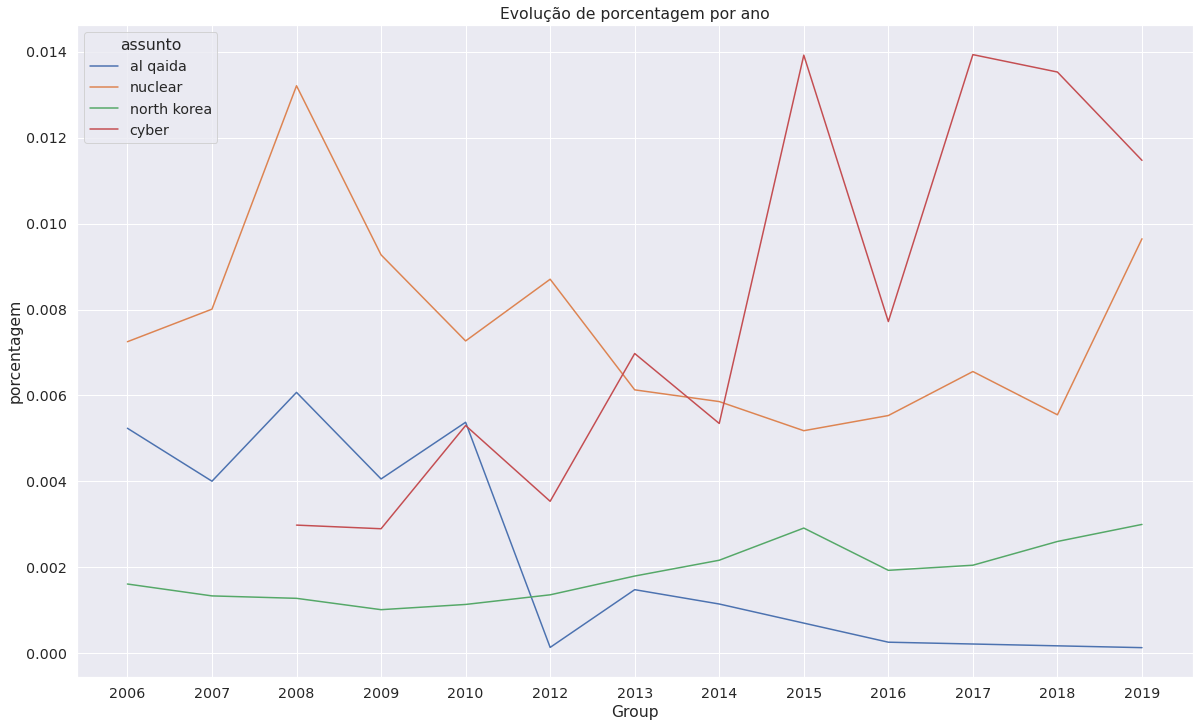

In [33]:
u.plota_analise(analise, 'porcentagem', 'linha')

In [34]:
analise

,Group,quantidade,porcentagem,assunto
0,2008,14.0,0.001491,cyber
1,2009,20.0,0.001449,cyber
2,2010,35.0,0.002650,cyber
3,2012,13.0,0.001768,cyber
4,2013,33.0,0.003488,cyber
5,2014,21.0,0.002674,cyber
6,2015,43.0,0.006959,cyber
7,2016,30.0,0.003860,cyber
8,2017,52.0,0.007102,cyber
9,2018,39.0,0.006763,cyber
